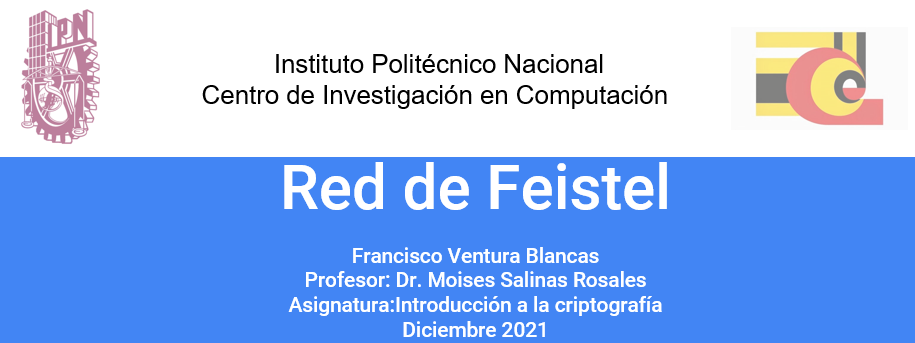

Algoritmo de cifrado de Feistel

1.- Cree una lista de todos los caracteres de texto sin formato.
 
2.- Convierta el texto sin formato a Ascii y luego al formato binario de 8 bits.
 
3.- Divida la cadena binaria de texto sin formato en dos mitades: mitad izquierda (L1) y mitad derecha (R1)
 
4.- Genere claves binarias aleatorias (K1 y K2) de longitud igual a la mitad de la longitud del Texto sin formato para las dos rondas.




In [ ]:
import binascii

In [ ]:
#Funciones como en C las declaro hasta arriba
# de texto claro a ASCII

def text_to_ascii(text):
    text_to_ascii = [ord(character) for character in text]
    return text_to_ascii

In [ ]:
#de Ascii a binario

def toBinary(PT):
    PT_Ascii = [ord(x) for x in PT]
    PT_Bin = [format(y,'08b') for y in PT_Ascii]
    PT_Bin = "".join(PT_Bin)
    return PT_Bin


In [ ]:
# Random bits key generation
def rand_key(p):
     
    import random
    key1 = ""
    p = int(p)
     
    for i in range(p):
         
        temp = random.randint(0,1)
        temp = str(temp)
        key1 = key1 + temp
         
    return(key1)

In [ ]:
# Function to implement bit exor
def exor(a,b):
     
    temp = ""
     
    for i in range(len(a)):
         
        if (a[i] == b[i]):
            temp += "0"
             
        else:
            temp += "1"
             
    return temp

In [ ]:
def text_to_half_Right(val):
    n = int(len(val)//2)
    L1 = val[0:n]
    return L1 




In [ ]:
def text_to_half_Left(val1):
    n = int(len(val1)//2)
    R1 = val1[n::]
    return R1

In [ ]:
def BinaryToDecimal(binary):
       
    # Using int function to convert to
    # string   
    string = int(binary, 2)
       
    return string

In [ ]:

#DEFINO MI ENTRADA Y LA IMPRIMO

my_input = input()


""" mi entrada la tengo que enviar a una lista voy a usar la funcion split
    separada por espacio en blanco
"""

lista = my_input.split(" ")


for val in lista:
    print("texto en claro: {} texto en hexadecimal : {} de HEX a binario : {}".format(val,text_to_ascii(val),toBinary(val)))



FranciscoVenturaBlancas
texto en claro: FranciscoVenturaBlancas texto en hexadecimal : [70, 114, 97, 110, 99, 105, 115, 99, 111, 86, 101, 110, 116, 117, 114, 97, 66, 108, 97, 110, 99, 97, 115] de HEX a binario : 0100011001110010011000010110111001100011011010010111001101100011011011110101011001100101011011100111010001110101011100100110000101000010011011000110000101101110011000110110000101110011


In [ ]:
#ahora tengo que dividir un byte a la mitad para pasar cada mitad por una
#una encryptcion XOR

print(len(toBinary(val))) # la cadena de string completa
rightPart = len(toBinary(val))/2   #lado derecho la mitad de la cadena
leftPart = len(toBinary(val))/2  #lado izquierdo la otra mitad


print(toBinary(val))
print(text_to_half_Right(toBinary(val)))

R1 = text_to_half_Right(toBinary(val))

print(text_to_half_Left(toBinary(val)))

R2 = text_to_half_Left(toBinary(val))


184
0100011001110010011000010110111001100011011010010111001101100011011011110101011001100101011011100111010001110101011100100110000101000010011011000110000101101110011000110110000101110011
01000110011100100110000101101110011000110110100101110011011000110110111101010110011001010110
11100111010001110101011100100110000101000010011011000110000101101110011000110110000101110011


In [ ]:
# Generar Llave para la primera
K1= rand_key(len(text_to_half_Right(toBinary(val))))  
# Generar Llave para la segunda
K2= rand_key(len(text_to_half_Left(toBinary(val))))

print(K1)
print(K2)





11100111011000011110000100000101011111110100001000111011110011001000110011010100111100111011
11110110010000100000101000010100110010111101011101111000010001100101011001100001010101110101


In [ ]:
#una vez que tengamos los las llaves y los bloques de izquierda a derecha
#vamos a realizar realizar el Xor

# primer bloque de Feistel
f1 = exor(R1,K1)
R2 = exor(f1,R2)
L2 = R1
  
# segundo bloque de Feistel
f2 = exor(R2,K2)
R3 = exor(f2,L2)
L3 = R2


In [ ]:
# Texto Cifrado

bin_data = L3 + R3
str_data =' '
 
for i in range(0, len(bin_data), 7):
 
    temp_data = bin_data[i:i + 7]   
  
    decimal_data = BinaryToDecimal(temp_data)
    str_data = str_data + chr(decimal_data)
     
print("Texto cifrado:", str_data)

Texto cifrado:  #th \A6H=LKa^A3BgHO


In [ ]:
# Decryption
L4 = L3
R4 = R3
  
f3 = exor(L4,K2)
L5 = exor(R4,f3)
R5 = L4
  
f4 = exor(L5,K1)
L6 = exor(R5,f4)
R6 = L5
PT1 = R6 +L6
  
 
PT1 = int(PT1, 2)
RPT = binascii.unhexlify( '%x'% PT1)
print(RPT)

b'FranciscoVenturaBlancas'
